In [1]:
import numpy as np
import os
import json
import sys
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import matplotlib
import pandas as pd

sys.path.append("../")
import src.plot as myplot
import seaborn as sns


In [2]:
import importlib
import src.plot as myplot
importlib.reload(myplot)

<module 'src.plot' from '/Users/paulhosek/PycharmProjects/mcm/MCM_classifier/Classifier_1/mcm/paper_plots/../src/plot.py'>

In [13]:
samples_path = '../data/OUTPUT/mcm/sample_sizes_fromfull/'
fname = 'MCMs_'

In [23]:
# 2. For a sample size, compute the fraction of correct members in the group of each icc
# that is get the partition map and check fraction overlap between rows in where the 1s are excluding diagonal
nr_runs = 10
digit = 0

sample_sizes = [10, 1000 ,2000,3000, 5423]
sample_sizes = [10, 1000 ,2000,3000, 6315]

coo_sum = np.empty((5,121,121),dtype=int)
n_samples = 50
mcm_all_com = []
for s, sample_size in enumerate(sample_sizes):
    # load runs
    mcm_sample = []
    mcms_path = os.path.join(samples_path, str(sample_size), "MCMs")
    for i in range(n_samples): #len(os.listdir(mcms_path))):
        with open(os.path.join(mcms_path, fname+str(i)+ ".json")) as f:
                mcm_sample.append(json.load(f))
    mcm_0_multisample = np.array([myplot.create_cooccurance_matrix(mcm_sample[i][digit]) for i in range(nr_runs)],dtype=int)
    coo_sum[s,:,:] = np.sum(mcm_0_multisample,axis=0)
    mcm_all_com.append(mcm_sample)




Standard Deviation per Row at 5423:
[120  11   1  22   0 110  10 119  33   2 109 111  99  12  44   4 108  45
   5   7 118  98  23   6   9  21  71  61  18  29  50  57  60  55  17  85
  95   3   8  88 102  27  13  62 103 100 114  46  80 112  28  32  20  16
 104  89  66  77  68 115 116  36  26 106  86 105  72  49 113  43  15  38
  82  81  70  40  51  34  96  79  90  39  19 117  35  87  69  59  14  24
  78  74  91 101  37  25 107  97  31  52  63  65  76  54  58  30  41  73
  67  56  48  47  42  75  64  53  83  94  84  92  93]
0


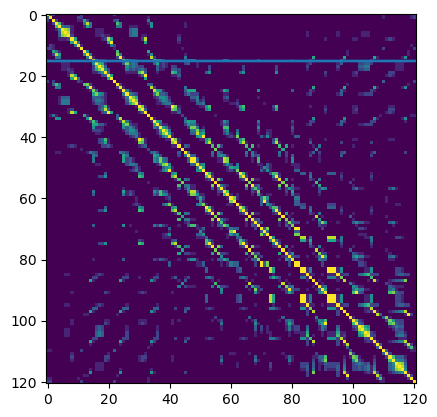

In [24]:
import numpy as np
arr = coo_sum[-1,:,:]
nodiag = arr.copy()
np.fill_diagonal(nodiag,0)
std_per_row = np.std(nodiag, axis=1)
min_per_row = np.min(nodiag, axis=1)
max_per_row = np.max(nodiag, axis=1)

print("Standard Deviation per Row at 5423:")

res = np.argsort(std_per_row)
print(res)
# print("Minimum per Row:")
print(np.argmax(min_per_row))

# print("Maximum per Row:")
# print(np.argmax(max_per_row))

plt.imshow(arr)
for i in res[:10]:
    plt.axhline(15)

 Histogram 

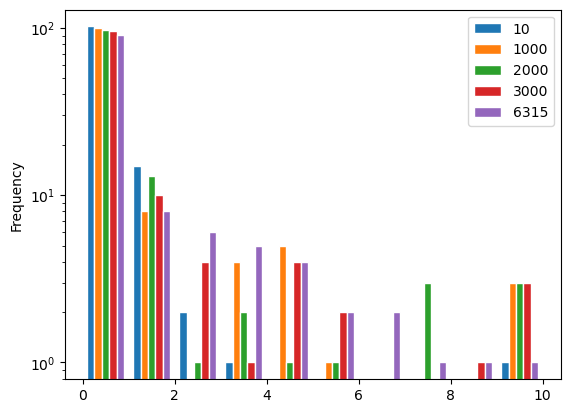

In [25]:
r = 15

cmap = matplotlib.colormaps["viridis_r"]
colors = [cmap(i) for i in np.linspace(0,1,coo_sum.shape[0])]

fig, ax = plt.subplots()

# [coo_sum[i, r, :] > 0]
res = [coo_sum[i, r, :] for i in range(coo_sum[:, r, :].shape[0])]

ax.hist(res,alpha=1,edgecolor="white", linewidth=1, stacked=False, density=False) #, color=colors[ss],histtype="barstacked", bins=10)
ax.set_xlabel("")
ax.set_yscale("log")

# ax.set_xscale("log")
ax.set_ylabel("Frequency")
legend_dict = {sample_sizes[i]:c for i,c in enumerate(colors)}
ax.legend(legend_dict)
plt.show()


Just take row and show

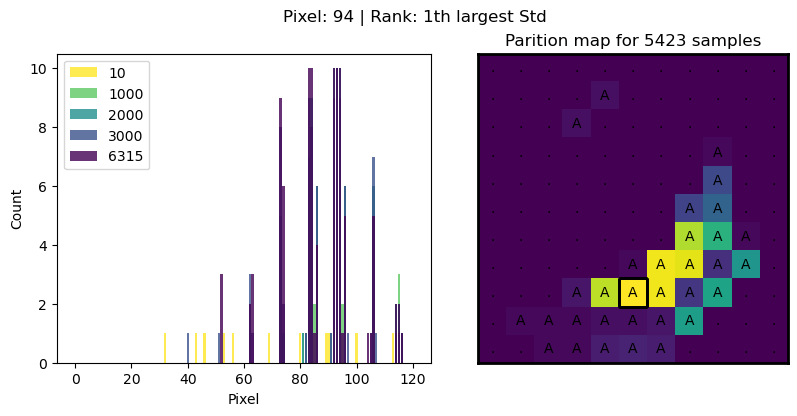

In [26]:
sorted_rows = np.argsort(std_per_row)[::-1]
i = 0
r = sorted_rows[i]

cmap = matplotlib.colormaps["viridis_r"]
colors = [cmap(i) for i in np.linspace(0,1,coo_sum.shape[0])]
scale = .7
fig, axs = plt.subplots(1,2,figsize=(12*scale,6*scale))

# [coo_sum[i, r, :] > 0]
res = [coo_sum[i, r, :].copy() for i in range(coo_sum[:, r, :].shape[0])]

# hist
legend_dict = {sample_sizes[i]:c for i,c in enumerate(colors)}
fig.suptitle(f"Pixel: {r+1} | Rank: {i+1}th largest Std")
for i, sample in enumerate(res):
    # sample[r] = 0
    axs[0].bar(range(len(sample)), sample,color=colors[i], alpha=.8)
    axs[0].set_xlabel('Pixel')
    axs[0].set_ylabel('Count')
axs[0].legend(legend_dict)

# parition map
myplot.interesting_pix_map(mcm_all_com[i], [r], nr_runs, digit=0,ax = axs[1],map_kwargs={"cbar":None})
axs[1].set_title("Parition map for 5423 samples")
plt.tight_layout()
plt.show()


[array([ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        10, 10]),
 array([ 1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0

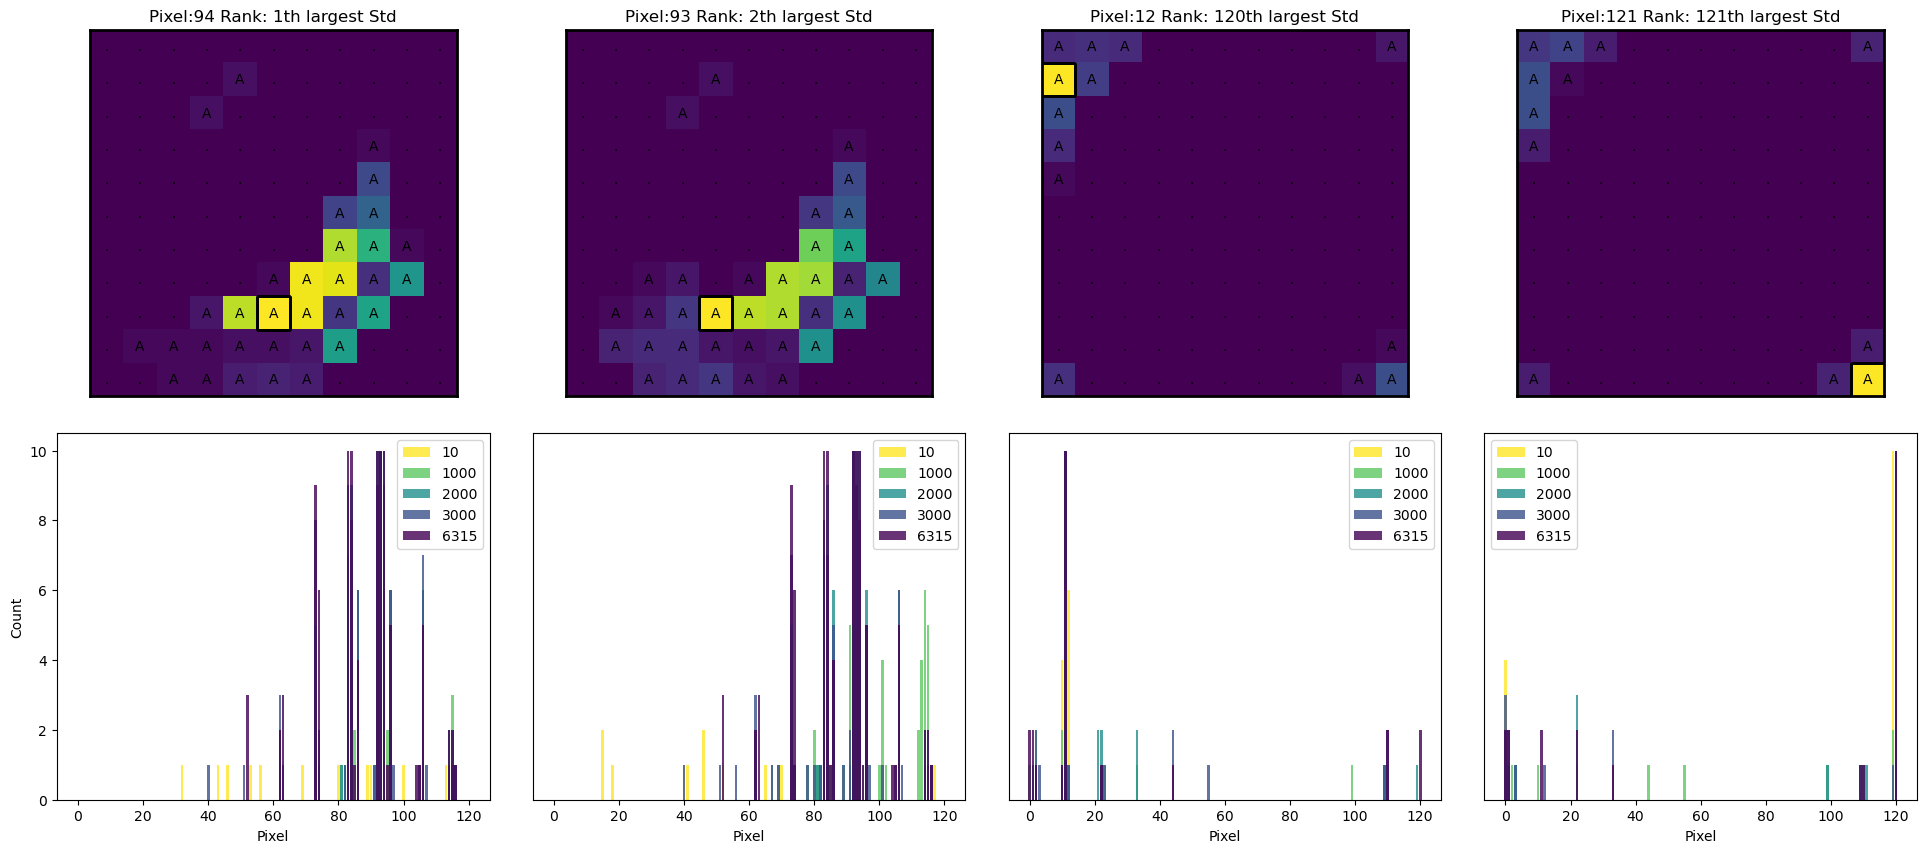

In [27]:
digit = 0

sorted_rows = np.argsort(std_per_row)[::-1]
ix_sel = [0,1,119,120]
# ix_sel = [30,59,60,90]

interesting_pix = sorted_rows[ix_sel]

scale = 2
fig, axs = plt.subplots(2, 4, figsize=(scale*12, scale*5), gridspec_kw = {'wspace':0.1, 'hspace':0.1})


axs = axs.flatten()

for i, ax in enumerate(axs[:4]): 
    myplot.interesting_pix_map(mcm_all_com[-1], [interesting_pix[i]], nr_runs, digit=0,ax = ax,map_kwargs={"cbar":None})
    ax.set_title(f'Pixel:{interesting_pix[i]+1} Rank: {ix_sel[i]+1}th largest Std') # fill rank in here


for i, ax in enumerate(axs[4:]):
    r = interesting_pix[i]
    res = [coo_sum[i, r, :].copy() for i in range(coo_sum[:, r, :].shape[0])]


    for j, sample in enumerate(res):
        # sample[r] = 0
        ax.bar(range(len(sample)), sample,color=colors[j], alpha=.8)
        
        ax.set_xlabel('Pixel')

    
    if i == 0:
        ax.set_ylabel('Count')
    else:
        ax.get_yaxis().set_visible(False)

    ax.legend(legend_dict)


res

In [28]:
interesting_pix

array([ 93,  92,  11, 120])

#### Heatmap instead of hist

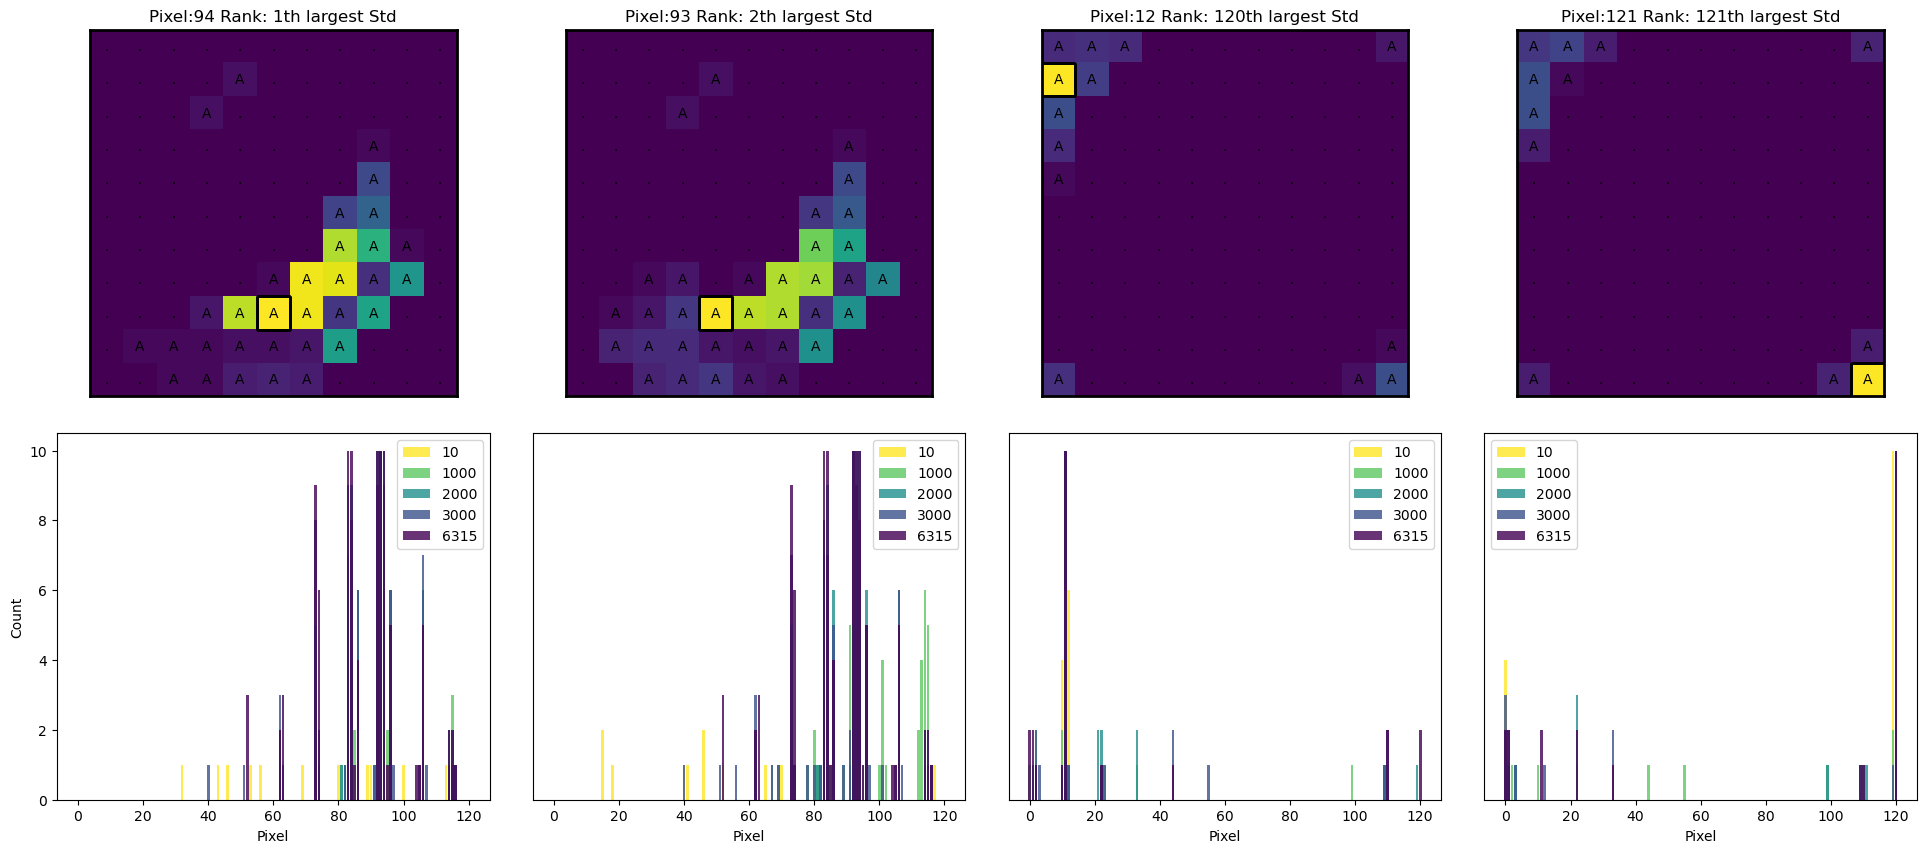

In [29]:
digit = 0

sorted_rows = np.argsort(std_per_row)[::-1]
ix_sel = [0,1,119,120]
# ix_sel = [30,59,60,90]

interesting_pix = sorted_rows[ix_sel]

scale = 2
fig, axs = plt.subplots(2, 4, figsize=(scale*12, scale*5), gridspec_kw = {'wspace':0.1, 'hspace':0.1})


axs = axs.flatten()

for i, ax in enumerate(axs[:4]): 
    myplot.interesting_pix_map(mcm_all_com[-1], [interesting_pix[i]], nr_runs, digit=0,ax = ax,map_kwargs={"cbar":None})
    ax.set_title(f'Pixel:{interesting_pix[i]+1} Rank: {ix_sel[i]+1}th largest Std') # fill rank in here


for i, ax in enumerate(axs[4:]):
    r = interesting_pix[i]
    res = [coo_sum[i, r, :].copy() for i in range(coo_sum[:, r, :].shape[0])]


    for j, sample in enumerate(res):
        # sample[r] = 0
        ax.bar(range(len(sample)), sample,color=colors[j], alpha=.8)
        
        ax.set_xlabel('Pixel')

    
    if i == 0:
        ax.set_ylabel('Count')
    else:
        ax.get_yaxis().set_visible(False)

    ax.legend(legend_dict)


# res

Paritionmap ranking pixels by their std

In [30]:
# sorted_rows
std_per_row
np.argsort(std_per_row).argsort()



array([  4,   2,   9,  37,  15,  18,  23,  19,  38,  24,   6,   1,  13,
        42,  88,  70,  53,  34,  28,  82,  52,  25,   3,  22,  89,  95,
        62,  41,  50,  29, 105,  98,  51,   8,  77,  84,  61,  94,  71,
        81,  75, 106, 112,  69,  14,  17,  47, 111, 110,  67,  30,  76,
        99, 115, 103,  33, 109,  31, 104,  87,  32,  27,  43, 100, 114,
       101,  56, 108,  58,  86,  74,  26,  66, 107,  91, 113, 102,  57,
        90,  79,  48,  73,  72, 116, 118,  35,  64,  85,  39,  55,  80,
        92, 119, 120, 117,  36,  78,  97,  21,  12,  45,  93,  40,  44,
        54,  65,  63,  96,  16,  10,   5,  11,  49,  68,  46,  59,  60,
        83,  20,   7,   0])

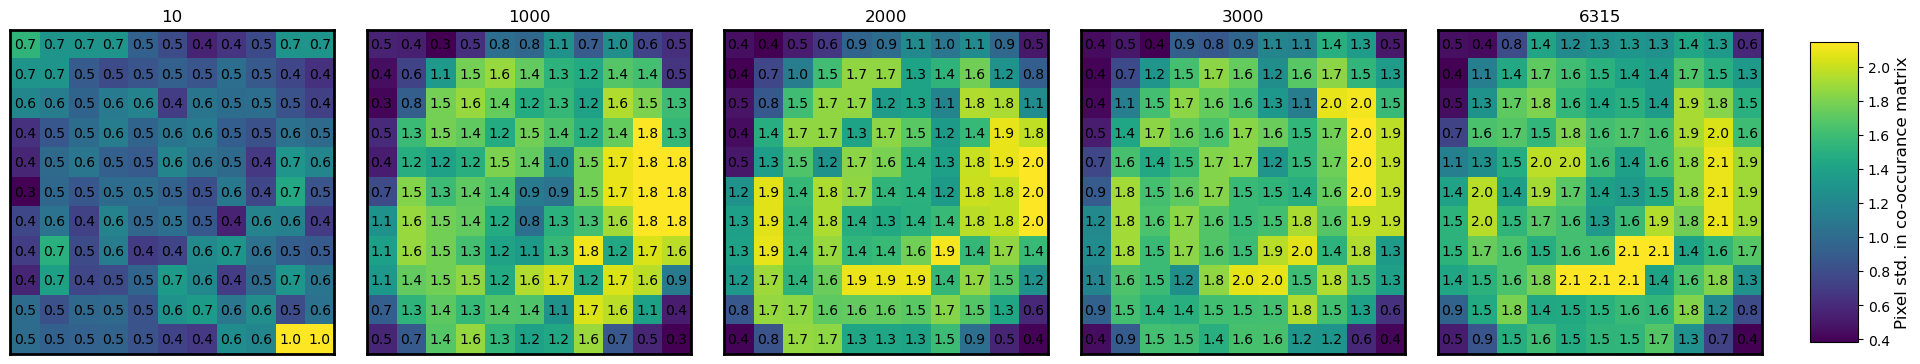

In [36]:
sample_sizes

scale = 2
fig, axs = plt.subplots(1, 5, figsize=(scale*12, scale*5), gridspec_kw = {'wspace':0.1, 'hspace':0.1})

for i,v in enumerate(sample_sizes):
    arr = coo_sum[i,:,:]
    nodiag = arr.copy()
    np.fill_diagonal(nodiag,0)
    std_per_row = np.std(nodiag, axis=1)
    sorted_rows = np.argsort(std_per_row)[::-1]
    ranks = sorted_rows.argsort()

    ax = axs[i]
    ax.set_title(v)
    # im = myplot.partition_map(ax, ranks.reshape((11,11))+1,ranks.reshape((11,11))+1, None,cmap="viridis", normalise=False, cbar = False)
    im = myplot.partition_map(ax, std_per_row.reshape((11,11)),std_per_row.reshape((11,11)).round(1), None,cmap="viridis", normalise=False, cbar = False)
    if i == len(sample_sizes)-1:
        fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.83,
                    wspace=0.02, hspace=0.02)
        cbar_ax = fig.add_axes([0.85, 0.35, 0.02, 0.3])
        cbar = fig.colorbar(im, cax=cbar_ax)   
        cbar.set_label('Pixel std. in co-occurance matrix',fontsize=12)
plt.savefig("./img/intpix_std.png", dpi=100,bbox_inches="tight")